In [1]:
import os
import glob

import cv2
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from tqdm.notebook import tqdm

In [2]:
img_paths = glob.glob("./data/images/*.jpg")
img_paths[:5]

['./data/images/67.jpg',
 './data/images/4.jpg',
 './data/images/0.jpg',
 './data/images/97.jpg',
 './data/images/8.jpg']

In [3]:
frontalface_default_cascade = cv2.CascadeClassifier("./opencv-haarcascade/haarcascade_frontalface_default.xml")
profileface_cascade = cv2.CascadeClassifier("./opencv-haarcascade/haarcascade_profileface.xml")

In [4]:
def detect_faces(img_rgb):
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    frontalfaces = frontalface_default_cascade.detectMultiScale(gray, 1.03, 3, 0, (32, 32))
    profilefaces = profileface_cascade.detectMultiScale(gray, 1.03, 3, 0, (32, 32))
    faces = list(filter(lambda x: len(x) > 0, [frontalfaces, profilefaces]))
    if len(faces) == 0:
        return np.array([], dtype=np.int32)
    else:
        return np.concatenate(faces)

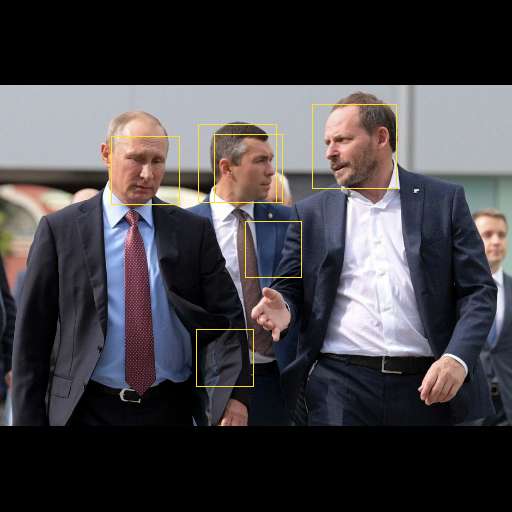

In [5]:
img_path = "./data/images/61.jpg"

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = tf.image.resize_with_pad(img_rgb, 512, 512).numpy().astype(np.uint8)
faces = detect_faces(img_rgb)

img = Image.fromarray(img_rgb)
draw = ImageDraw.Draw(img)
for x, y, w, h in faces:
    draw.rectangle([(x, y), (x + w, y + h)], outline=(255, 221, 45), width=1)

img

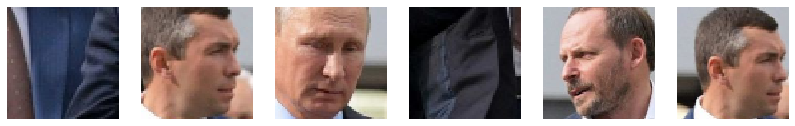

In [6]:
plt.figure(figsize=(14, 5))
for i, (x, y, w, h) in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    
    plt.imshow(img_rgb[y:y+h, x:x+w])
    plt.axis('off')

In [7]:
for path in tqdm(img_paths):
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb = tf.image.resize_with_pad(img_rgb, 512, 512).numpy().astype(np.uint8)
    faces = detect_faces(img_rgb)
    
    img = Image.fromarray(img_rgb)
    img_name = path.split('/')[-1]
    for i, (x, y, w, h) in enumerate(faces):
        face = img.crop((x, y, x+w, y+h))
        face.save(f"./data/images/faces/{img_name.split('.')[0]}_{i}.jpeg", "JPEG")